# Step-1: Business Problem Understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Extract Data Load

In [3]:
df = pd.read_csv(r"nike_sales_data.csv")


In [4]:
df.shape

(50250, 13)

In [5]:
df.head(10)

,Order ID,Gender Category,Product Line,Product Name,Size,Units Sold,MRP,Discount Applied,Revenue,Order Date,Sales Channel,Region,Profit
0,NK202300000,Female,Running,Nike Vaporfly Next% 2,7.0,2,9143,0.0,18286.00,2023-12-14,Nike.com,Nagpur,7131.540
1,NK202300001,Male,Lifestyle,Nike Air Max 90 Essential,11.0,1,17928,0.0,17928.00,2023-08-19,Nike Store,Mumbai,5378.400
2,NK202300002,Male,Running,Nike React Miler 3,10.0,2,8759,0.0,17518.00,2023-07-04,Nike Store,Nagpur,5605.760
3,NK202300003,Male,Kids,Nike Air Max 270 Kids,5.0,1,14925,15.0,12686.25,2023-12-28,Marketplace,Hyderabad,2238.750
4,NK202300004,Female,Basketball,Nike Air Force 1 07,8.0,1,7988,0.0,7988.00,2023-07-02,Nike.com,Chennai,2955.560
5,NK202300005,Female,Lifestyle,Nike Dunk Low Retro,7.0,1,8108,5.0,7702.60,2023-11-25,Partner Retail,Jaipur,1512.142
6,NK202300006,Male,Running,Nike Alphafly Next%,10.0,2,8542,0.0,17084.00,2023-10-19,Marketplace,Agra,3245.960
7,NK202300007,Female,Running,Nike Air Zoom Tempo Next%,7.0,2,9598,40.0,11517.60,2024-01-19,Nike.com,Pune,2879.400
8,NK202300008,Male,Training,Nike Free Metcon 5,9.0,2,6310,10.0,11358.00,2023-08-06,Nike Store,Pune,2839.500
9,NK202300009,Others,Football,Nike Mercurial Vapor 14 Elite,9.0,1,8876,0.0,8876.00,2023-10-03,Nike Store,Indore,2840.320


## Data Understanding

In [6]:
df.columns

Index(['Order ID', 'Gender Category', 'Product Line', 'Product Name', 'Size',
       'Units Sold', 'MRP', 'Discount Applied', 'Revenue', 'Order Date',
       'Sales Channel', 'Region', 'Profit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50250 entries, 0 to 50249
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          50250 non-null  object 
 1   Gender Category   49871 non-null  object 
 2   Product Line      50250 non-null  object 
 3   Product Name      50250 non-null  object 
 4   Size              49942 non-null  float64
 5   Units Sold        50250 non-null  object 
 6   MRP               50250 non-null  object 
 7   Discount Applied  49932 non-null  float64
 8   Revenue           50250 non-null  float64
 9   Order Date        50250 non-null  object 
 10  Sales Channel     50250 non-null  object 
 11  Region            49987 non-null  object 
 12  Profit            50250 non-null  float64
dtypes: float64(4), object(9)
memory usage: 5.0+ MB


*Some columns have incorrect data types — ‘Units Sold’ and ‘MRP’ are stored as objects instead of numeric, and ‘Order Date’ is in object format instead of datetime.*

# Data Exploration

In [8]:
print(df["Gender Category"].unique())
df["Gender Category"].isnull().sum()

['Female' 'Male' 'Others' nan]


379

*The ‘Gender Category’ column contains 379 null values.*

In [9]:
df["Product Line"].unique()

array(['Running', 'Lifestyle', 'Kids', 'Basketball', 'Training',
       'Football'], dtype=object)

*The ‘Product Line’ column has no null values and its data type is correct*

In [10]:
df["Product Name"].unique()

array(['Nike Vaporfly Next% 2', 'Nike Air Max 90 Essential',
       'Nike React Miler 3', 'Nike Air Max 270 Kids',
       'Nike Air Force 1 07', 'Nike Dunk Low Retro',
       'Nike Alphafly Next%', 'Nike Air Zoom Tempo Next%',
       'Nike Free Metcon 5', 'Nike Mercurial Vapor 14 Elite',
       'Nike Dunk Low Retro PS', 'Nike Savaleos Slip-On', 'Nike PG 6',
       'Nike Revolution 6', 'Nike Air Max 95', 'Nike Air Zoom Pegasus 39',
       'Nike Phantom GT2 Elite', 'Nike Structure 24', 'Nike Romaleos 4',
       'Nike Tiempo Legend 9 Elite', 'Nike Air Jordan 5 Retro',
       'Nike Cosmic Unity 2', 'Nike Phantom GT Club', 'Nike Premier 3 FG',
       'Nike React Trainer 2', 'Nike Phantom Venom Academy',
       'Nike Kyrie 8', 'Nike Precision 6', 'Nike Renew Elevate 3',
       'Nike Blazer Mid 77', 'Nike Air Jordan 1 Retro High',
       'Nike Air Jordan 11 Retro', 'Nike Zoom Fly 5',
       'Nike Pegasus Trail 3', 'Nike Court Borough Low 2',
       'Nike Mercurial Victory 3', 'Nike Air Zoom V

*All values in the Product Name column are correct, with no null values.*

In [11]:
print(df["Size"].isnull().sum())
df["Size"].unique()

308


array([ 7., 11., 10.,  5.,  8.,  9.,  4., 12.,  6.,  1.,  2.,  3., 13.,
       nan])

*The Size column has a total of 308 missing values. and  values are float we have to convert into integer*

In [12]:
print(df["Units Sold"].isnull().sum())
df["Units Sold"].unique()

0


array(['2', '1', '3', '4', 'two', '5', '-1', 'three', 'one', 'four'],
      dtype=object)

*The ‘Units Sold’ column contains inconsistent values — it includes both numeric and string entries (e.g., ‘one’, ‘two’, ‘three’, ‘four’, and ‘-1’).*

In [13]:
print(df["MRP"].isnull().sum())
df["MRP"].unique()

0


array(['9143', '17928', '8759', ..., '19553', '7307 INR', '22019'],
      dtype=object)

*The ‘MRP’ column contains inconsistent data — some values include text like ‘INR’ along with numbers. These entries need to be cleaned by removing non-numeric characters and then converted to a numeric data type (float) for proper analysis.*

In [14]:
print(df["Discount Applied"].isnull().sum())
df["Discount Applied"].unique()

318


array([  0.,  15.,   5.,  40.,  10.,  30.,  20.,  nan, 150.])

*The ‘Discount Applied’ column contains 318 null values and some numeric entries. These nulls need to be handled (e.g., by filling with 0 or appropriate values*

In [15]:
print(df["Revenue"].isnull().sum())
df["Revenue"].unique()

0


array([18286.  , 17928.  , 17518.  , ...,  5651.55, 10134.55, 21380.  ])

*Revenue in this column all valus are right.*

In [16]:
print(df["Order Date"].dtype)
df["Order Date"].isnull().sum()

object


0

*Order_Date in this column dtype is wrong datatype we have to invert in to time series.*

In [17]:
df["Sales Channel"].unique()

array(['Nike.com', 'Nike Store', 'Marketplace', 'Partner Retail',
       'Nike App'], dtype=object)

*Sales_Channel in this columns total values are right*

In [18]:
print(df["Region"].isnull().sum())
df["Region"].unique()

263


array(['Nagpur', 'Mumbai', 'Hyderabad', 'Chennai', 'Jaipur', 'Agra',
       'Pune', 'Indore', 'Faridabad', 'Unknown City', 'Surat',
       'Ahmedabad', 'Delhi', 'Kolkata', 'Bhopal', 'Bangalore', 'Ludhiana',
       'Nashik', 'Kanpur', 'Patna', 'Vadodara', 'Lucknow', 'Test City',
       nan], dtype=object)

*Region in this column total 263 null values*

In [19]:
print(df["Profit"].isnull().sum())
df["Profit"].unique()


0


array([7131.54, 5378.4 , 5605.76, ..., 7910.6 , 2746.04, 5242.2 ])

*The ‘Profit’ column contains correct numeric values with no nulls,.*

**Gender Category: 379 null values
Size: 308 null values
Discount Applied: 318 null values
Region: 263 null values**

**Other columns like Order ID, Product Line, Product Name, Units Sold, MRP, Revenue, Order Date, Sales Channel, Profit have no nulls.**

In [20]:
df.duplicated().sum()

0

**The dataset was checked for duplicate values, and no duplicate rows were found.**

# Data Cleaning

In [21]:
print(df["Gender Category"].unique())
missing_percentage = (df["Gender Category"].isnull().sum()/len(df))*100
print(missing_percentage)

['Female' 'Male' 'Others' nan]
0.7542288557213931


In [22]:
df = df.dropna(subset=["Gender Category"]) 

*Gender Category column in 0.7% data are missing so those records were removed during cleaning.*

In [23]:
print(df["Size"].unique())
missing_percentage = (df["Size"].isnull().sum()/len(df))*100
print(missing_percentage)

[ 7. 11. 10.  5.  8.  9.  4. 12.  6.  1.  2.  3. 13. nan]
0.6175933909486475


In [24]:
size_counts = df["Size"].value_counts()
print(size_counts)

Size
9.0     7916
11.0    7534
8.0     7332
10.0    7220
7.0     6629
12.0    3649
5.0     3326
6.0     2740
4.0     1233
13.0     744
3.0      733
1.0      354
2.0      153
Name: count, dtype: int64


In [25]:
df = df.dropna(subset=["Size"]) # we are removed null values.

In [26]:
df['Size'] = df['Size'].astype(int)

*The Size column we are removed null values and other values are invert into integer*

In [27]:
print(df["Units Sold"].unique())
# we have to replace some values.
replacement_map = {
    'one': 1,
    'two': 2,
    'three':3,
    'four': 4,
    'five': 5,
    '-1': 0
}
df["Units Sold"] = df["Units Sold"].replace(replacement_map)

# we have to convert in all values are integer.
df["Units Sold"] = df["Units Sold"].astype(int)


['2' '1' '3' '4' 'two' '5' '-1' 'three' 'one' 'four']


*This process involved data cleansing and conversion for the 'Unit sold' column. Textual representations of numbers, such as 'two' and 'three', were mapped to their integer values, and the entire column was converted to a uniform integer data type.*

In [28]:
print(df["MRP"].unique())
df["MRP"]  = df["MRP"].astype(str)
df['MRP'] = df['MRP'].str.replace('INR', '').str.replace(',', '')

['9143' '17928' '8759' ... '19553' '7307 INR' '22019']


In [29]:
df["MRP"] = df["MRP"].astype(int)
print(df['MRP'].unique())

[ 9143 17928  8759 ... 12841 19553 22019]


*This process involved cleaning the 'MRP' column by first converting all its values to strings. Then, any occurrences of 'INR' and ',' were removed from these string values, preparing the column for numerical conversion. Finally, the cleaned values were converted into a numeric data type, with any non-convertible entries being replaced by NaN.*

In [30]:
print(df["Discount Applied"].unique())
df["Discount Applied"] = df["Discount Applied"].fillna(0)
df = df[df['Discount Applied'].astype(int) != 150.0]


[  0.  15.   5.  40.  10.  30.  20.  nan 150.]


In [31]:
df["Discount Applied"].unique()

array([ 0., 15.,  5., 40., 10., 30., 20.])

*The ‘Discount Applied’ column originally contained 318 missing values and one outlier (150). The missing values were replaced with 0, as they represent no discount, and the outlier was removed to ensure data accuracy.*

In [32]:
# Order Date this column datatype is wrong we have convert in date time.
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True, errors='coerce')
df['Order Date'] = df['Order Date'].dt.strftime('%Y-%m-%d')


In [33]:
print(df["Order Date"].isnull().sum())
df= df.dropna(subset=["Order Date"])

320


*The ‘Order Date’ column contained mixed formats and some invalid entries. It has been converted from string to datetime using pd.to_datetime with errors coerced to NaT, making it ready for time-based analysis.*

In [34]:
print(df["Region"].unique())
df["Region"].isnull().sum()

['Nagpur' 'Mumbai' 'Hyderabad' 'Chennai' 'Jaipur' 'Agra' 'Pune' 'Indore'
 'Faridabad' 'Unknown City' 'Surat' 'Ahmedabad' 'Delhi' 'Kolkata' 'Bhopal'
 'Bangalore' 'Ludhiana' 'Nashik' 'Kanpur' 'Patna' 'Vadodara' 'Lucknow'
 'Test City' nan]


256

In [35]:
df= df.dropna(subset=["Region"])
df = df[df['Region'] != 'Unknown City'] # he known city la delete kel.

*“All missing values i removed it*

In [36]:
df.columns

Index(['Order ID', 'Gender Category', 'Product Line', 'Product Name', 'Size',
       'Units Sold', 'MRP', 'Discount Applied', 'Revenue', 'Order Date',
       'Sales Channel', 'Region', 'Profit'],
      dtype='object')

In [37]:
# Categorical = [Order_ID, Gender_Category, Product_Line, Product_Name, Size, Sales_Channel, Region]

# continuous = ["Units_Sold, MRP, Discount_Applied, Revenue, Profit"]

# Date/Time = ["Order_Date"]


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48754 entries, 0 to 50249
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          48754 non-null  object 
 1   Gender Category   48754 non-null  object 
 2   Product Line      48754 non-null  object 
 3   Product Name      48754 non-null  object 
 4   Size              48754 non-null  int32  
 5   Units Sold        48754 non-null  int32  
 6   MRP               48754 non-null  int32  
 7   Discount Applied  48754 non-null  float64
 8   Revenue           48754 non-null  float64
 9   Order Date        48754 non-null  object 
 10  Sales Channel     48754 non-null  object 
 11  Region            48754 non-null  object 
 12  Profit            48754 non-null  float64
dtypes: float64(3), int32(3), object(7)
memory usage: 4.6+ MB


In [39]:
df.isnull().sum()

Order ID            0
Gender Category     0
Product Line        0
Product Name        0
Size                0
Units Sold          0
MRP                 0
Discount Applied    0
Revenue             0
Order Date          0
Sales Channel       0
Region              0
Profit              0
dtype: int64

# Univariate

*Gender_Category*

*Which categories people are more buyes..?*

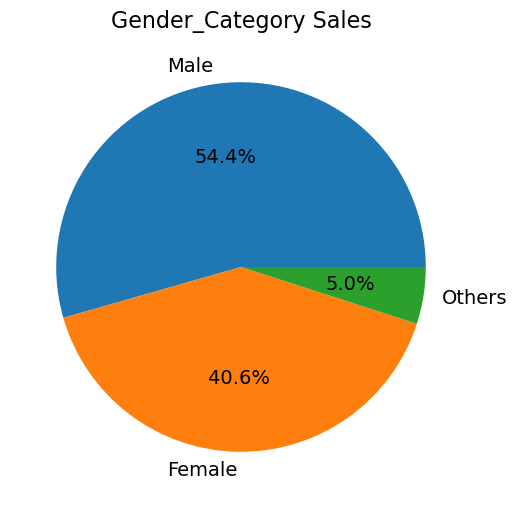

In [40]:
counts = df['Gender Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.title("Gender_Category Sales", fontsize=16)
plt.savefig("Gender_Category.png", dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()


*The disribution among "Men", "Women", "Others" almost diamand is males comparing others.*

**Product_Line**

*Which product line has the highest sales?*

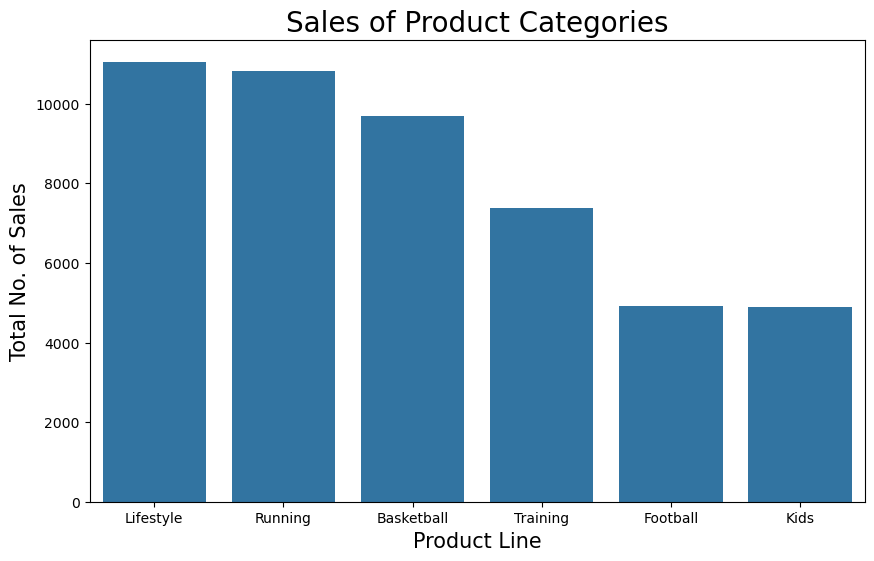

In [78]:
plt.figure(figsize=(10,6))

# Step 1: Sorted order (highest → lowest)
order = df['Product Line'].value_counts().index

# Step 2: Add 'order' in countplot
sns.countplot(x='Product Line', data=df, order=order)

# Step 3: Chart labels and title
plt.title("Sales of Product Categories", fontsize=20)
plt.xlabel("Product Line", fontsize=15)
plt.ylabel("Total No. of Sales", fontsize=15)

# Step 4: Save & show
plt.savefig("Product_Line.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


**Product Name**

*which product has highest sale..?*

Text(0.5, 0, 'Total Number of Sales')

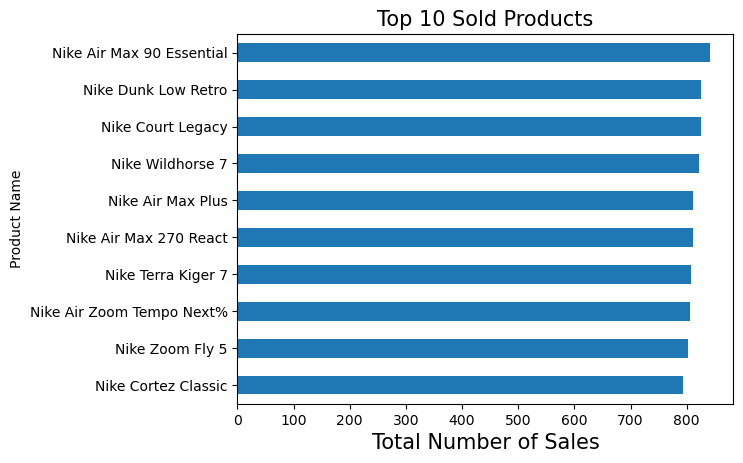

In [42]:
(df["Product Name"].value_counts().head(10).sort_values()).plot(kind='barh')
plt.title("Top 10 Sold Products",fontsize=15)
plt.xlabel("Total Number of Sales",fontsize=15)

The ‘Product Name’ column contains multiple unique product entries. For visualization and analysis, the top 10 most sold products were selected, and a bar plot was created to show their distribution clearly, avoiding overlap and improving readability.*

**Size**

*Most ordered product size?*

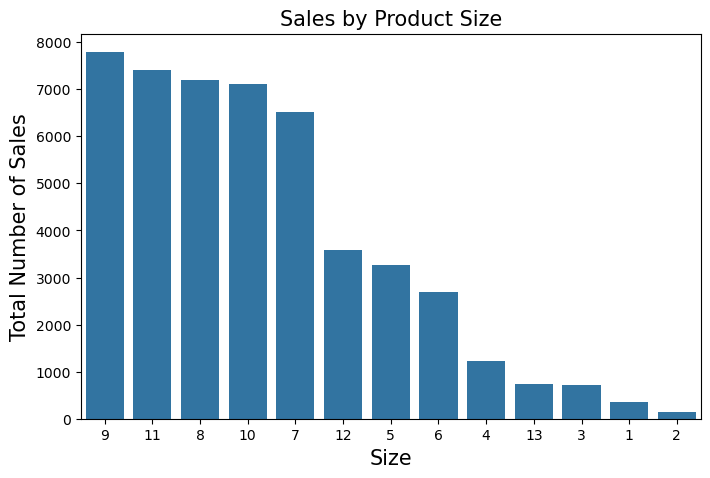

In [43]:
size_order = df['Size'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(8,5))
sns.countplot(x='Size', data=df, order=size_order)
plt.title('Sales by Product Size',fontsize=15)
plt.xlabel('Size',fontsize=15)
plt.ylabel('Total Number of Sales',fontsize=15)
plt.savefig("Size.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

*The ‘Size’ column shows the distribution of units sold for each shoe size. A bar plot was created in descending order of count, so the most sold sizes appear first, making it easy to identify popular and less popular sizes.*

**Units Sold**

*most units sold..?*

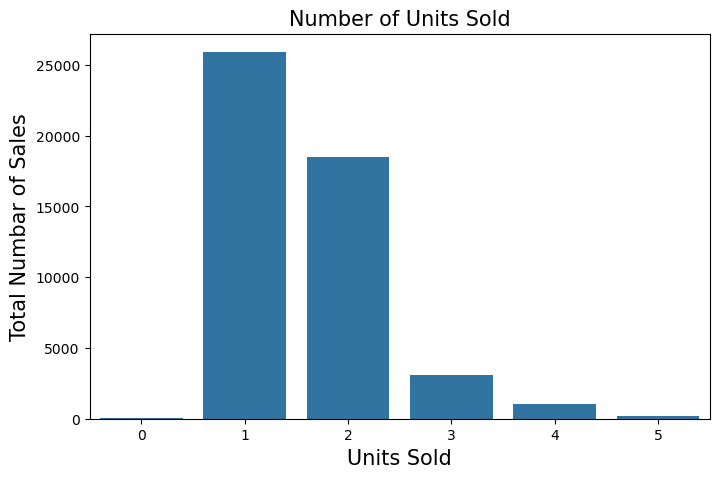

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(x='Units Sold', data=df, order=sorted(df['Units Sold'].unique()))
plt.title('Number of Units Sold',fontsize=15)
plt.xlabel('Units Sold',fontsize=15)
plt.ylabel('Total Numbar of Sales',fontsize=15)
plt.savefig("Units Sold.png",dpi=300)
plt.show()

*The ‘Units Sold’ column shows that most orders consisted of 1 unit, with very few orders having higher quantities.*

**MRP**

*which MRP sales more..?*

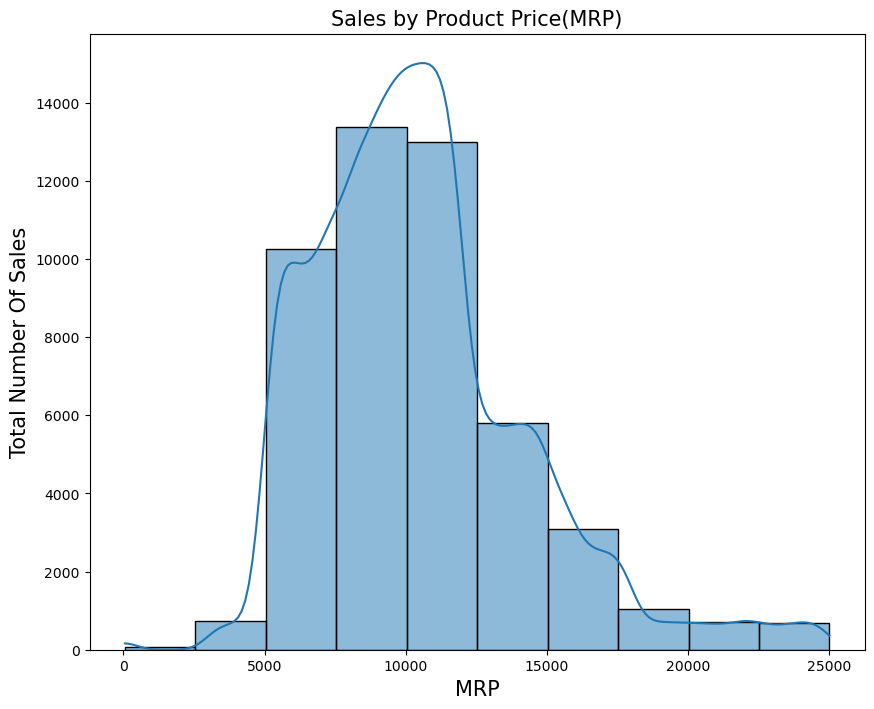

In [45]:
plt.figure(figsize=(10,8))
sns.histplot(df["MRP"], bins=10, kde=True)
plt.title("Sales by Product Price(MRP)",fontsize=15)
plt.xlabel("MRP",fontsize=15)
plt.ylabel("Total Number Of Sales",fontsize=15)
plt.savefig("MRP.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()


*Most products have an MRP between ₹7,000–₹12,000, showing mid-range prices dominate.
Very few items are above ₹18,000, indicating less demand for premium products.*

**Discount Applied**

*Which discount level used most?*

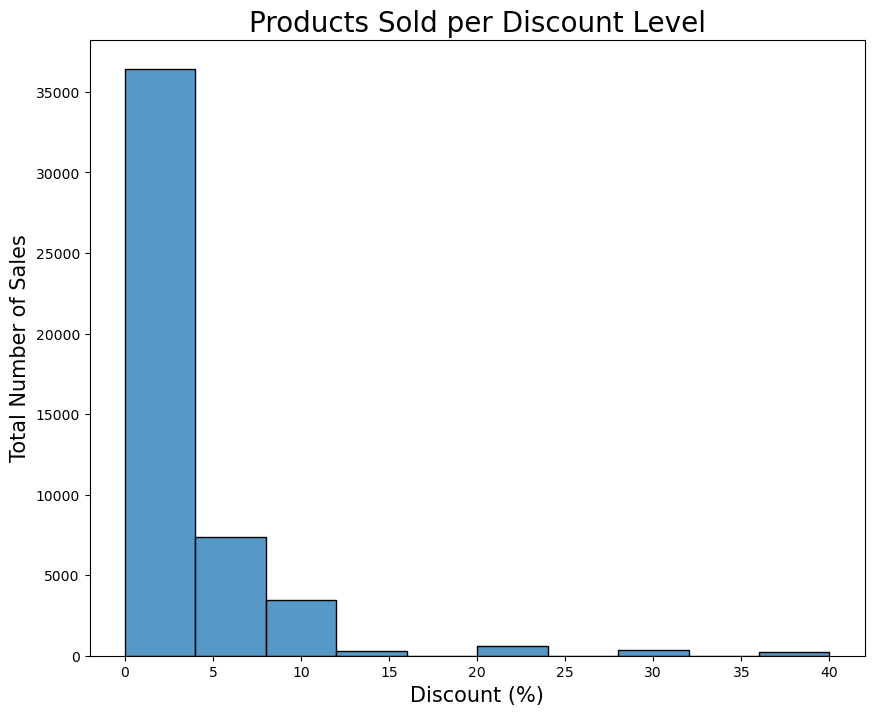

In [46]:
plt.figure(figsize=(10,8))
sns.histplot(df["Discount Applied"], bins=10, kde=False)
plt.title("Products Sold per Discount Level",fontsize=20)
plt.xlabel("Discount (%)", fontsize=15)
plt.ylabel("Total Number of Sales",fontsize=15)
plt.show()

*Most orders have low or no discounts (0-5%), showing that discount were rarely given.*

**Revenue**

*which is the most profitable Revenue..?*

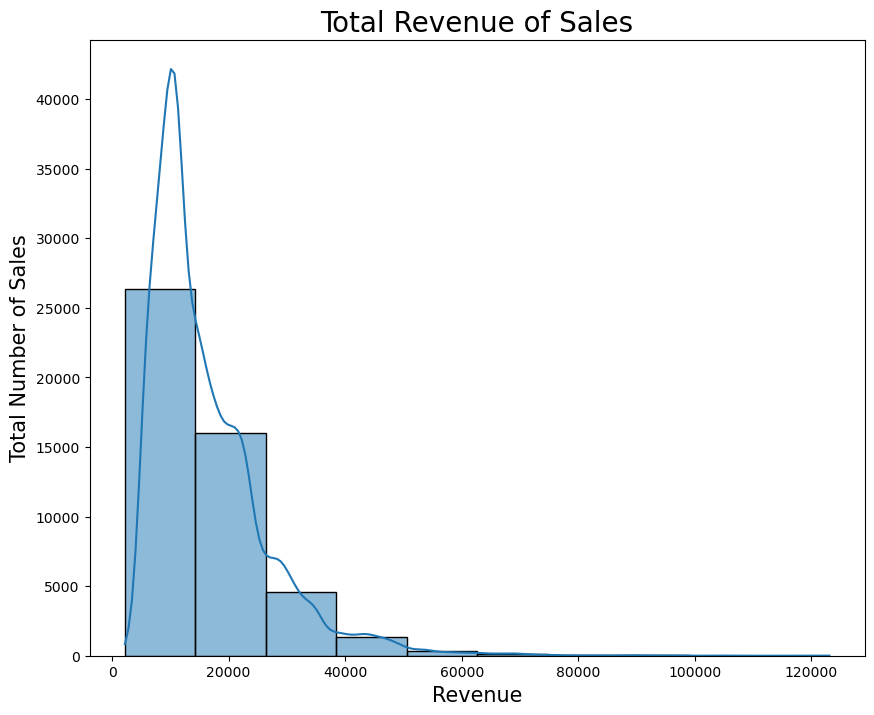

In [47]:
plt.figure(figsize=(10,8))
sns.histplot(df["Revenue"], bins=10,kde=True)
plt.title("Total Revenue of Sales",fontsize=20)
plt.xlabel("Revenue",fontsize=15)
plt.ylabel("Total Number of Sales",fontsize=15)
plt.savefig("Revenue.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

*The Revenue column in most purchase sales in lower-priced item*

**Sales Channel**

*Which channel sells most products?*

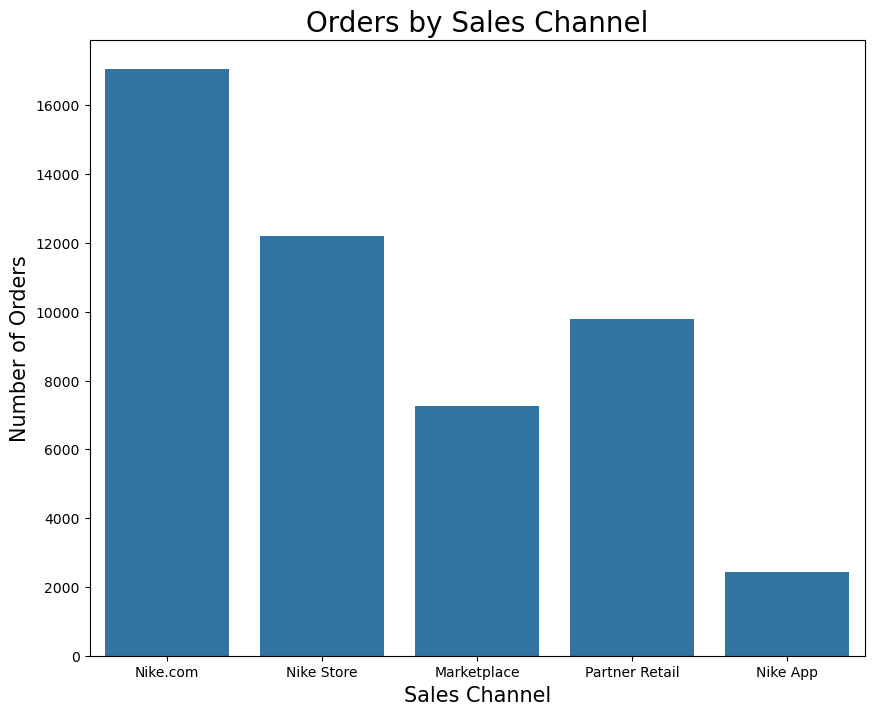

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(x='Sales Channel', data=df)
plt.title("Orders by Sales Channel",fontsize=20)
plt.xlabel("Sales Channel",fontsize=15)
plt.ylabel("Number of Orders",fontsize=15)
plt.savefig("Sales Channel.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

*Nike.com is the dominant sales channel with the highest number of orders. The Nike app and physical Nike Store are the next most significant channels.
Marketplace and Partner Retail channels contribute the least to the total order volumne.*

**Region**

*which Region in most sales..?*

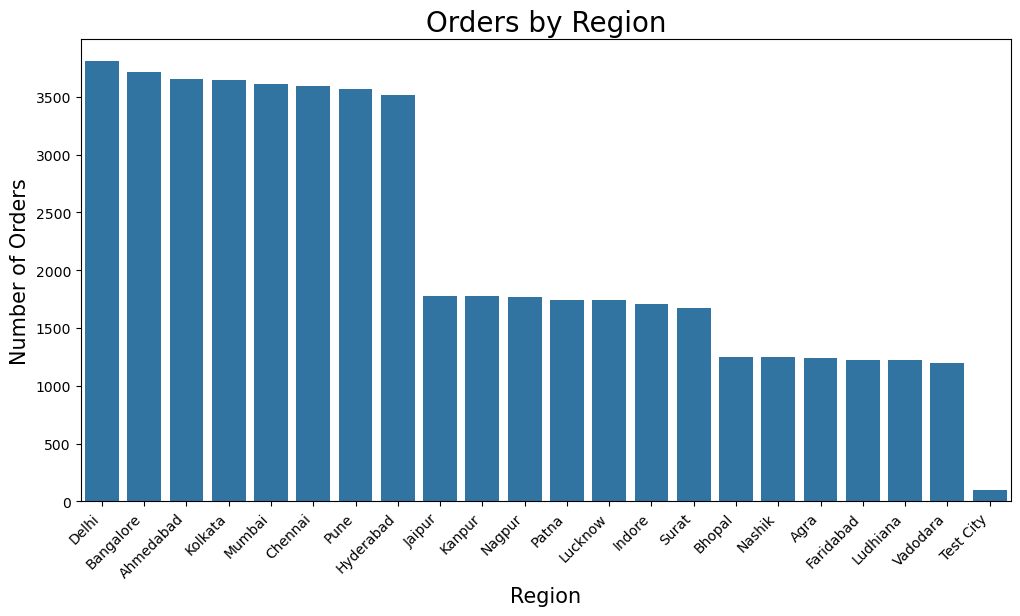

In [66]:
plt.figure(figsize=(12,6))

# Sort the regions by number of orders
order_counts = df['Region'].value_counts().sort_values(ascending=False)

sns.barplot(x=order_counts.index, y=order_counts.values)
plt.title("Orders by Region",fontsize=20)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of Orders",fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.savefig("Region.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()


*The graph shows that the highest number of orders were placed from cities like Ahmedabad, Delhi, and Bangalore.
Regions such as Agra, Indore, and Bhopal recorded comparatively lower sales.
This indicates that major metropolitan areas contribute significantly more to total orders, while smaller regions show limited activity.*

**Profit**

*Top Profit sales..?*

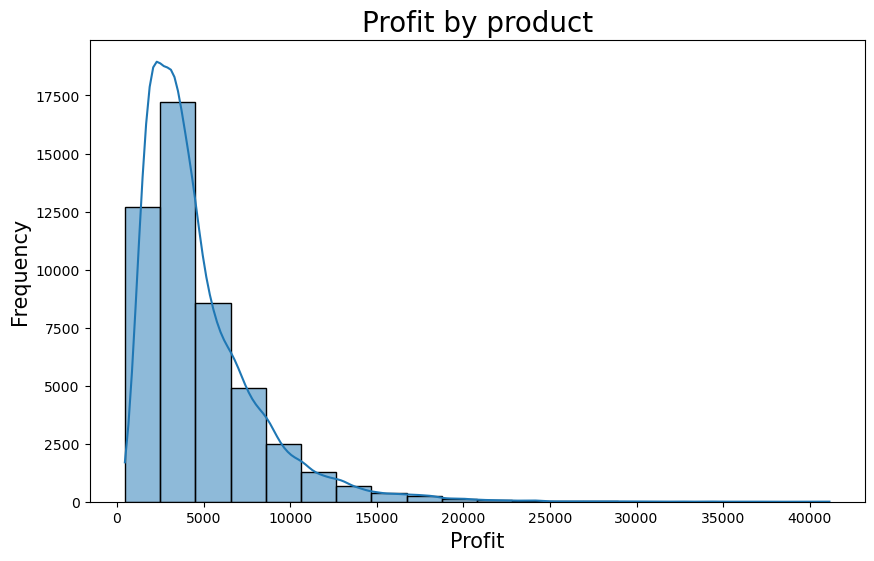

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(df['Profit'], bins=20, kde=True,)
plt.title("Profit by product",fontsize=20)
plt.xlabel("Profit",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.savefig("Profit.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

*The most majority of transaction generate a relatively low profit, as shows by the high frequency at the left of the graph.
Most Profit are concentrated in the lower range up to approximetely 5,000.*

## Bivariate

*Gender vs Product line*

*Which product line preferred by gender?*

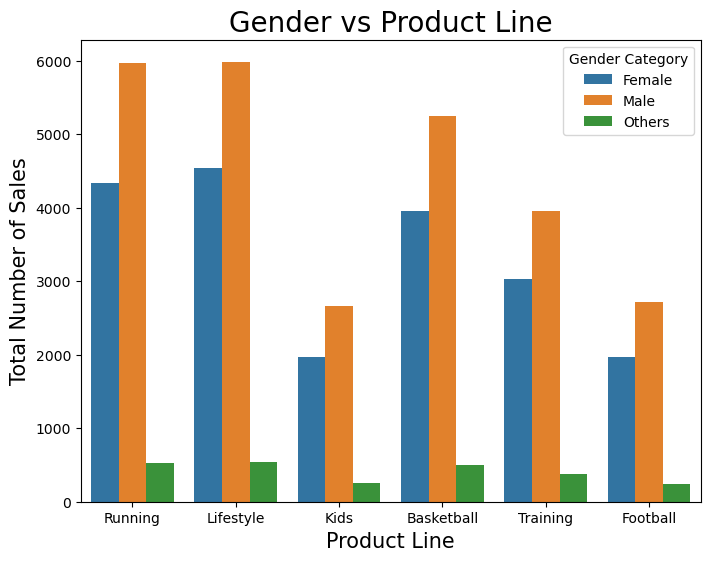

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='Product Line', hue='Gender Category', data=df) # y numeric axis var dakhavala.
plt.title('Gender vs Product Line',fontsize=20)                              # hue data color madhe divide karayla 
plt.xlabel("Product Line",fontsize=15)
plt.ylabel("Total Number of Sales",fontsize=15)
plt.savefig("Gender vs Product Line.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()

*The chart shows that male customers dominate purchases across all product lines, especially in Running and Lifestyle categories. Female customers also contribute significantly in Lifestyle and Basketball segments but remain lower than males overall. The ‘Others’ category has comparatively fewer purchases across all product lines.*

**Product Name vs Unit Sold**

*Which product sold the most units?*

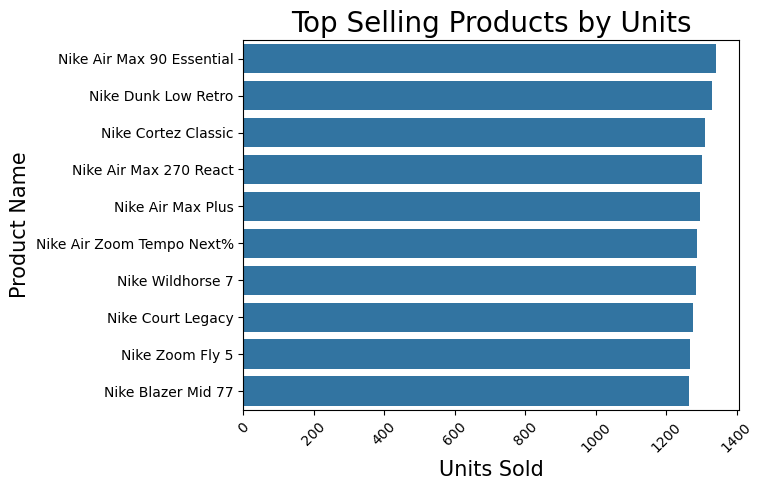

In [52]:
top_products = df.groupby('Product Name')['Units Sold'].sum().sort_values(ascending=False).head(10)
sns.barplot(y=top_products.index, x=top_products.values)  # ya madhe basana gelete manun top 10 product ghetal.
plt.title("Top Selling Products by Units",fontsize=20)
plt.xlabel("Units Sold",fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Product Name",fontsize=15)   # it is showing sum of units sold.
plt.savefig("Product Name vs Units Sold.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()


*The chart show that most purchased Nike Air Max 90 Essential shoes*

**Region vs Revenue**

*which region in most revenue generate..?*

In [53]:
df.groupby('Region')['Revenue'].mean().head(10)

Region
Agra         15368.095253
Ahmedabad    16193.471307
Bangalore    16737.072830
Bhopal       15560.780016
Chennai      16781.995627
Delhi        16479.177312
Faridabad    15772.837111
Hyderabad    16761.023300
Indore       15962.923302
Jaipur       15437.847266
Name: Revenue, dtype: float64

Text(0, 0.5, 'Region')

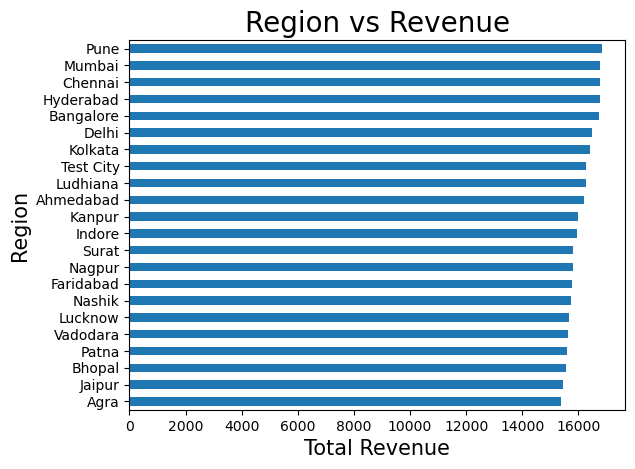

In [54]:
(df.groupby('Region')['Revenue'].mean()).sort_values().plot(kind='barh')
plt.title("Region vs Revenue",fontsize=20)
plt.xlabel("Total Revenue",fontsize=15)
plt.ylabel("Region",fontsize=15)

*The graph is showing to it the most revenue generate from delhi and second is the Banglore and others cityes are average*

**Month vs Revenue**

*which month in most revenue generate..?*

In [55]:
df['Order Date']=pd.to_datetime(df['Order Date'])   # object madhe hot tr timeseries madhe convert kel.

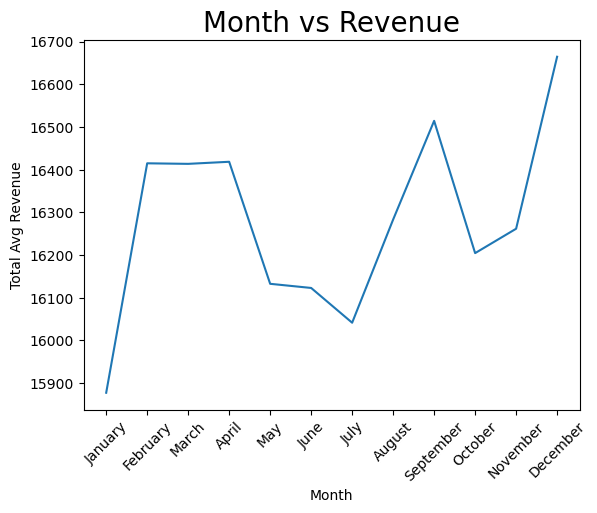

In [56]:
df["Month"] = df["Order Date"].dt.month   # month cha seperate column kel analysis sathi.
df["Weekday"] = df["Order Date"].dt.day_name()      # Weekely day kadal manje samjel ki kontya divashi jast sale hot aahe.
a=df.groupby('Month')['Revenue'].mean().reset_index().sort_values(by='Month')
sns.lineplot(data=a,x='Month',y='Revenue')
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=range(1, 13), labels=month_names)
plt.title("Month vs Revenue",fontsize=20)
plt.ylabel("Total Avg Revenue")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.savefig("Month vs Revenue.png", dpi=300,bbox_inches='tight',pad_inches=0.1) 
plt.show()

*The graph shows revenue over the year starting strong in january(around 15,700) and grow upto April and from april to july down and from august again grow to december.*

**Discount vs Revenue**

*If give discount any changes to high more sales and generate more revenue..?*

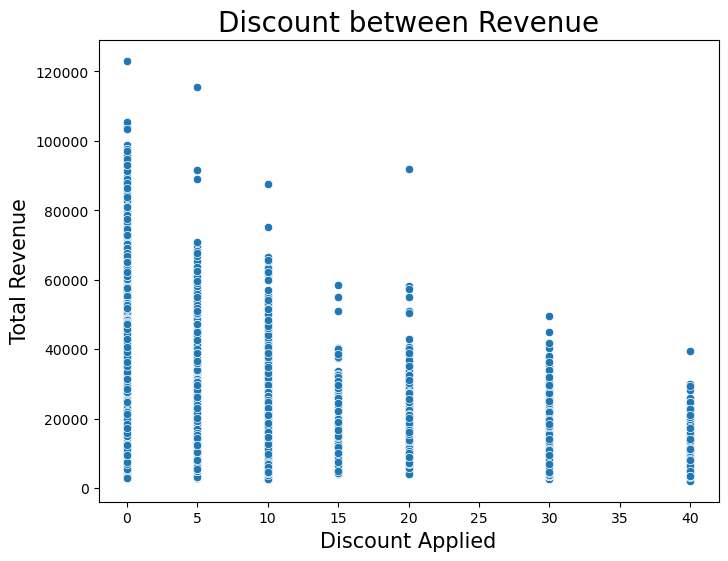

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Discount Applied", y="Revenue", data=df)
plt.title("Discount between Revenue",fontsize=20)
plt.xlabel("Discount Applied",fontsize=15)
plt.ylabel("Total Revenue",fontsize=15)
plt.show()

*The graph shows the relationship between discount percentage and revenue. so basically if given to the customers no more effect on revenue.*

**Weekly vs Units Sold**

*which day sales more products..?*

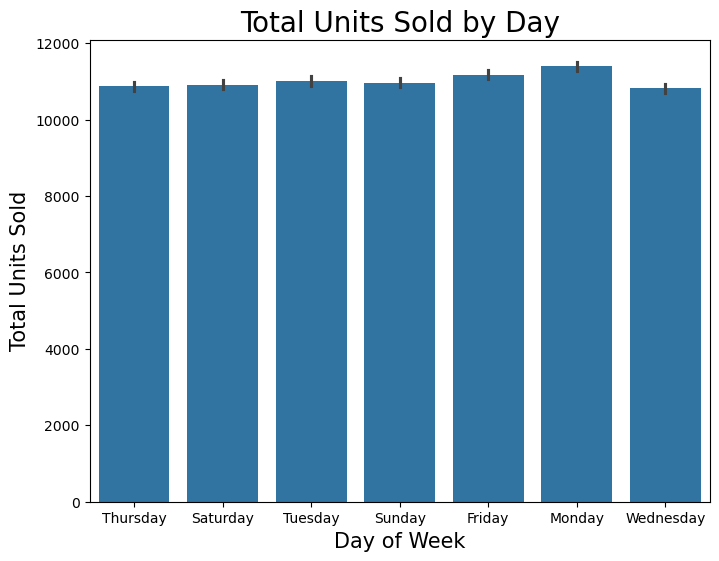

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x="Weekday", y="Units Sold", data=df,estimator='sum')
plt.title("Total Units Sold by Day",fontsize=20)
plt.xlabel("Day of Week",fontsize=15)
plt.ylabel("Total Units Sold",fontsize=15)
plt.show()

*Monday and friday some sales but all day almost same saleing.*

**Sales Channel vs Units Sold**

*which platform sales more products..?*

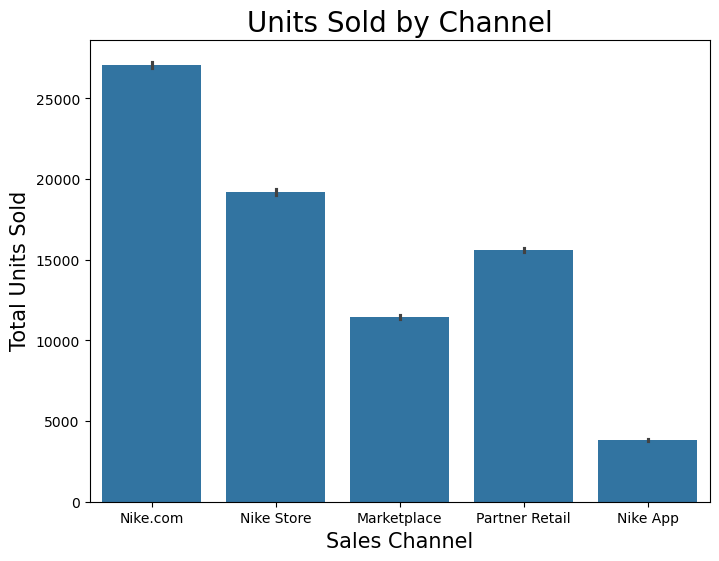

In [59]:
plt.figure(figsize=(8,6))
sns.barplot(x="Sales Channel", y="Units Sold", data=df,estimator="sum")
plt.title('Units Sold by Channel',fontsize=20)
plt.xlabel("Sales Channel",fontsize=15)
plt.ylabel("Total Units Sold",fontsize=15)
plt.show()

*Nike.com is by far the leading sales channel for units sold, significantly outperforming all others. The Nike Store and Marketplace from a middle tier, while Partner Retail and the Nike App show the lowest sales volumns.This indicates that the company's own online platform is its most critical distribution channel.*

**Discount Applied vs Units Sold**

*If given more discount any changes to more sales..?*

Text(0.5, 0, 'Discount Applied')

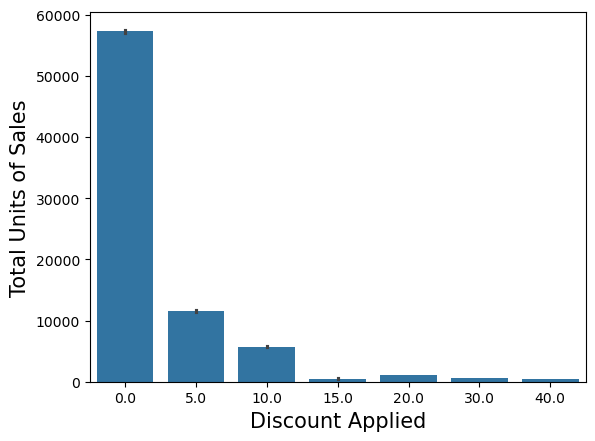

In [60]:
sns.barplot(data=df,x='Discount Applied',y='Units Sold',estimator='sum')
plt.ylabel("Total Units of Sales",fontsize=15)
plt.xlabel("Discount Applied",fontsize=15)

*Not any effect on sales if discount is gives to the customers.*

# Multivariate

**Gender Category vs Product Line vs Revenue**

*Which gender-category buys which product line?*

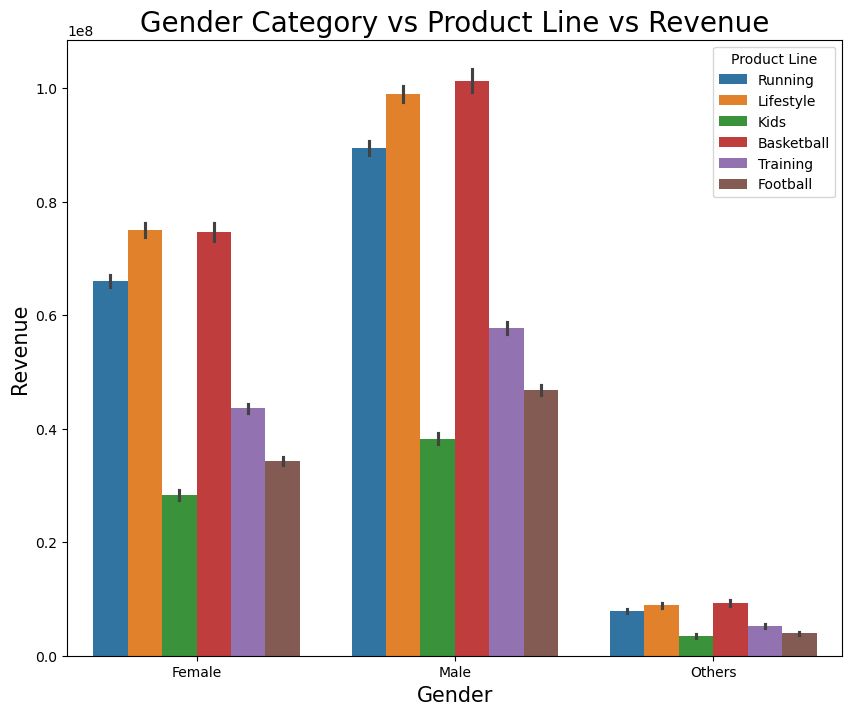

In [61]:
plt.figure(figsize=(10,8))
sns.barplot(x= "Gender Category", y="Revenue", hue="Product Line" ,data=df, estimator="sum")
plt.title("Gender Category vs Product Line vs Revenue",fontsize=20)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.show()

*The graph shows generated by different product lines across gender categories. The male category generates the highest revenue, with Running and lifestyle being the top-performance product lines. The Female category also shows strong revenue in the same key product lines.*

**Sales Channel vs Product Line VS Units Sold**

*Which channel sells which product line..?*

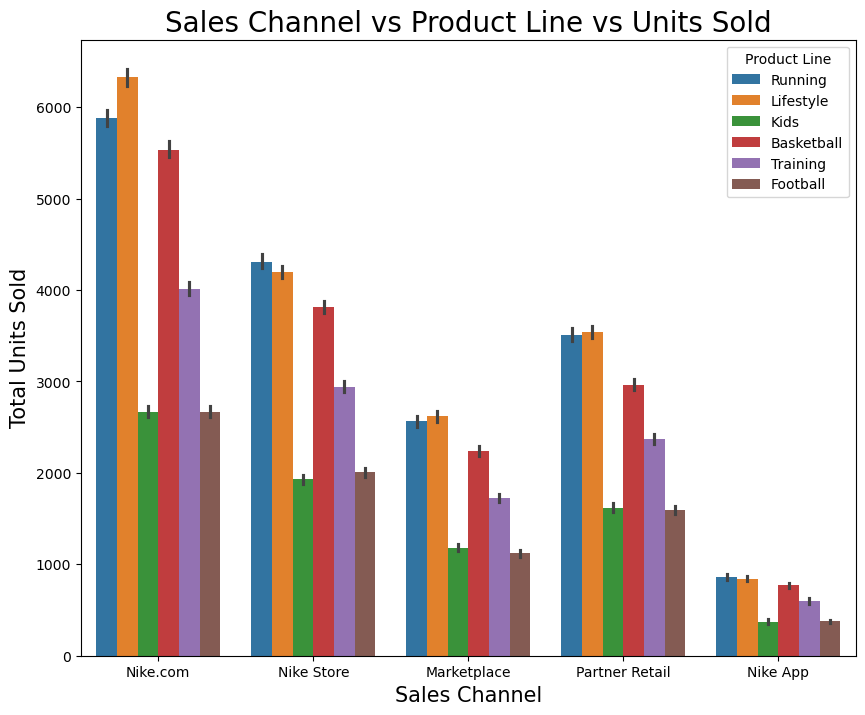

In [81]:
plt.figure(figsize=(10,8))
sns.barplot(x="Sales Channel", y="Units Sold", hue="Product Line", data=df, estimator="sum")
plt.title("Sales Channel vs Product Line vs Units Sold",fontsize=20)
plt.xlabel("Sales Channel",fontsize=15)
plt.ylabel("Total Units Sold",fontsize=15)
plt.savefig("Sales Channel vs Product Line vs Units Sold.png",dpi=300,bbox_inches='tight',pad_inches=0.1)
plt.show()


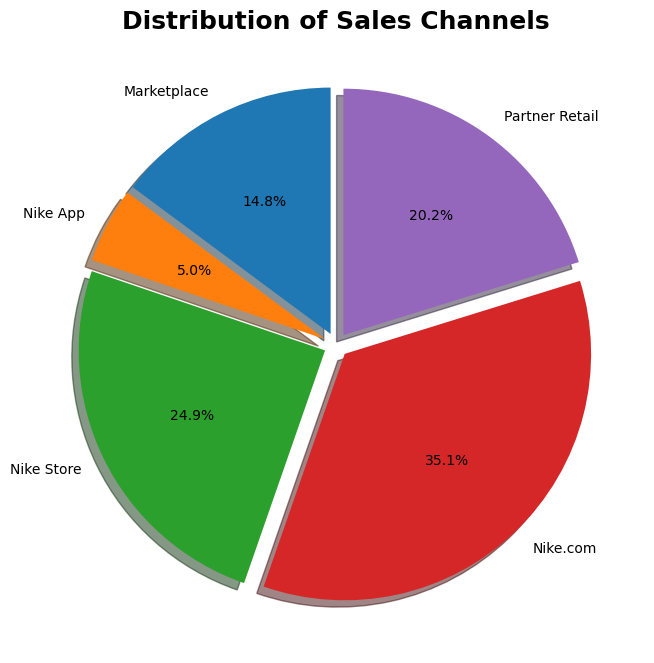

In [83]:
sales_data = df.groupby('Sales Channel')['Units Sold'].sum()
plt.figure(figsize=(8,8))
plt.pie(sales_data,labels=sales_data.index,autopct='%1.1f%%',startangle=90,explode=[0.05]*len(sales_data),shadow=True)
plt.title("Distribution of Sales Channels", fontsize=18, fontweight='bold')
plt.show()


*This graph shows that Nike.com is the dominant sales channel for units sold across all product lines, especially for Running and Lifestyle products. The Nike Store and Marketplacee are secondary channel with moderate sales. Partner Retail and the Nike App consistently show the lowest unit sales for every product category.*

**Month vs Units Sold  vs Product Line**

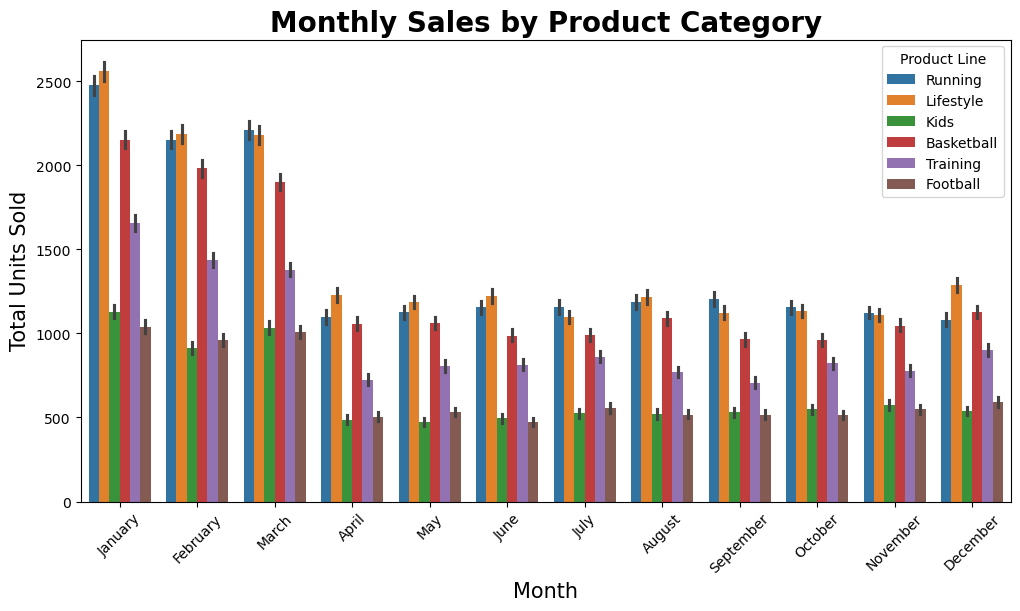

In [79]:
df["Month"] = df["Order Date"].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12,6))
sns.barplot(x='Month',y='Units Sold',hue='Product Line',data=df,estimator='sum',order=month_order)
plt.title('Monthly Sales by Product Category', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Total Units Sold', fontsize=15)
plt.xticks(rotation=45)
plt.savefig("Month_vs_Units_Sold_vs_Product_Line.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()


*The monthly sales graph shows the top-selling product categories each month. In January, Running and Lifestyle shoes had the highest sales. February saw strong sales for Running, Lifestyle, and Basketball categories, while in March, Running and Lifestyle remained the leading categories.*

**Month vs Revenue vs Product Line**

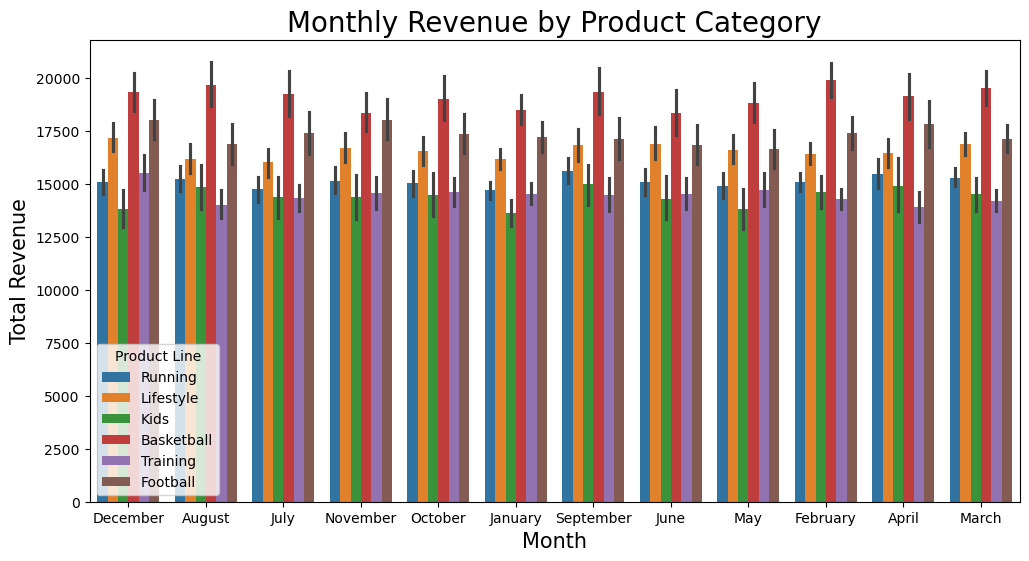

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(x='Month', y='Revenue', hue='Product Line', data=df)
plt.title('Monthly Revenue by Product Category',fontsize=20)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total Revenue',fontsize=15)
plt.show()

*From the monthly sales analysis, it is observed that Sports shoes consistently generated the highest revenue each month compared to other product categories. This indicates a strong and steady demand for Sports shoes throughout the year.*

**Discount Applied vs Units Sold vs Product Line**

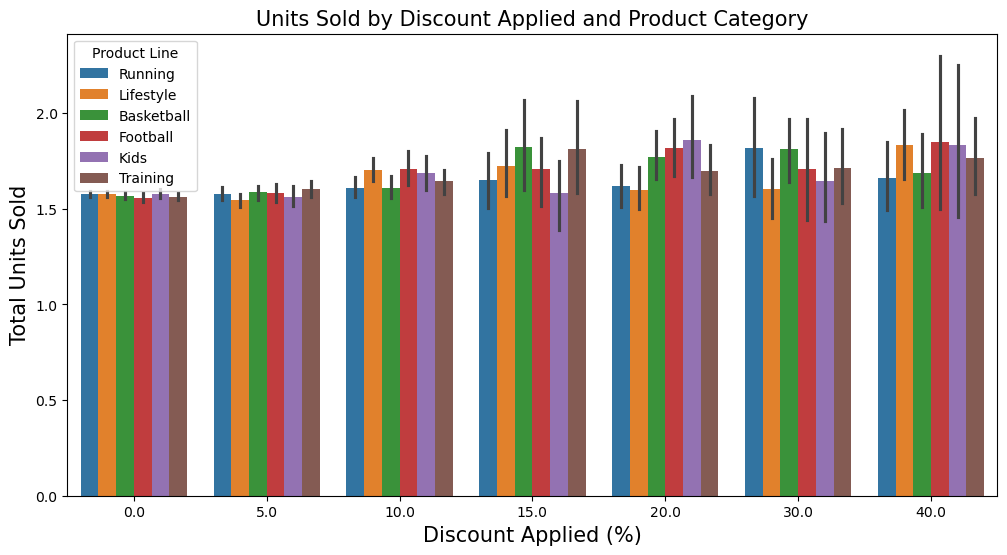

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(x='Discount Applied', y='Units Sold', hue='Product Line', data=df)
plt.title('Units Sold by Discount Applied and Product Category',fontsize=15)
plt.xlabel('Discount Applied (%)',fontsize=15)
plt.ylabel('Total Units Sold',fontsize=15)
plt.show()

*Sales slightly increase with higher discounts, indicating a moderate positive impact of discounts on units sold. Running and Lifestyle shoes remain the most sold categories across all discount levels.*

# Insights of  the Project

**Top- performing categories**
- Running and Lifestyle shoes consistently had the highest sales and revenue across most months.
- This shows these categories have stedy customer demand and should remain the company's primary focus.

**Effects of Discounts**
-This means Nike should optimize discount levels to balance between sales volume and profit.

**Customer Preferences**
- Male and Female customers preferred LIFESTYLE and RUNNING.
- This insight helps design gender-specific marketing strategies.

**Sales Channel**
- Most of the sales from nike.com means online channels contributed more revenue during discount months, while offline stores showed stable regular sales.

**Most Revenue**
- Most of the revenue comes from Sports category shoes, indicating customer preference towards performance and athletic products.

**Discount Effect**
- Even at lower discounts(0-10%), sales remain fairly stable, suggesting customers already have good interest in these products.
At higher discount(20-40%), units sold slightly increase, indicating that discount have moderate positive impact on sales.

**Seasonal trend in sales**
-Revenue peaks during December and January, possibly due to festive and New Year.

**Online channels generate more sales**
-If your "Sales Channel" columns shows higher revenue online, it means customers prefer online shopping.


